In [1]:
import pandas as pd
import ExploratoryDataAnalysis.dataReview as dataReading
import dataAnalysisModel.regression.LogisticRegression as logisticRegression
from dataPretreatment import MissingValueHanding, outlierDection
from dataPretreatment.WoE import WoEBin, IVDestribution, IVFiltering, adjustWoEByAuto,adjustWoEByManual
from sklearn.model_selection import train_test_split # 数据切割
%matplotlib inline

ModuleNotFoundError: No module named 'dataAnalysisModel.regression.LogisticRegression'

In [3]:
df = pd.read_csv('Credit data.csv',encoding='utf-8')

In [4]:
df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] < 90]

In [5]:
df = df.dropna(subset=["NumberOfDependents"]).reset_index(drop=True)
MV_data_DF = MissingValueHanding.KNNValue(df)
MV_data_DF = MV_data_DF.drop_duplicates()

In [13]:
# 1.1.5 Splitting the data set into a training and test set
X = MV_data_DF.iloc[:, 1:]
y = MV_data_DF.iloc[:, 0]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=0)
train = pd.concat([Y_train, X_train], axis=1)
test = pd.concat([Y_test, X_test], axis=1)

[INFO] creating woe binning ...
-------- 1/6 DebtRatio --------
>>> dt[DebtRatio].describe(): 
count      7274.000000
mean        321.594411
std        1619.070170
min           0.000000
25%           0.173590
50%           0.357661
75%           0.755358
max      110952.000000
Name: DebtRatio, dtype: float64 



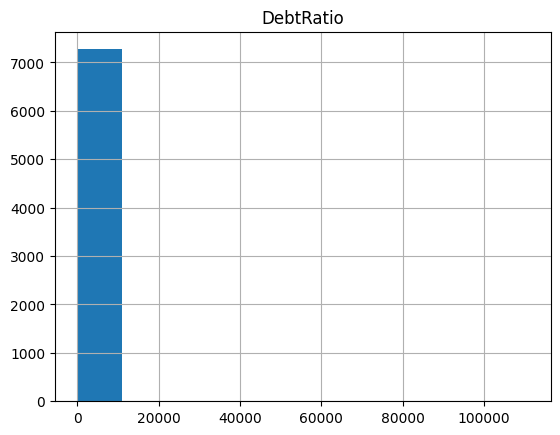

>>> Current breaks:
0.1,0.2,0.30000000000000004,0.4,0.7000000000000001,1.3 



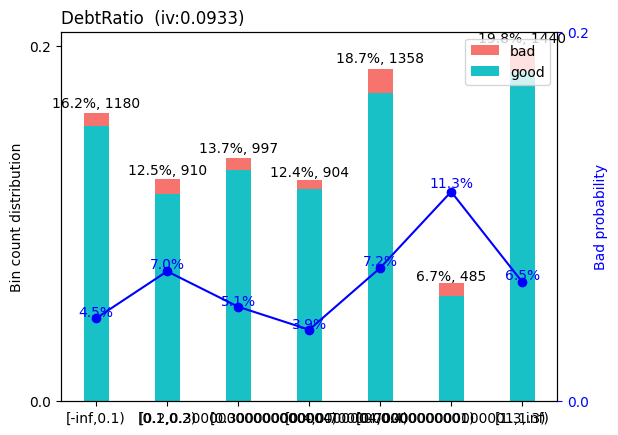

>>> Adjust breaks for (1/6) DebtRatio?
1: next 
2: yes 
3: back
Selection: 3
-------- 1/6 DebtRatio --------
>>> dt[DebtRatio].describe(): 
count      7274.000000
mean        321.594411
std        1619.070170
min           0.000000
25%           0.173590
50%           0.357661
75%           0.755358
max      110952.000000
Name: DebtRatio, dtype: float64 



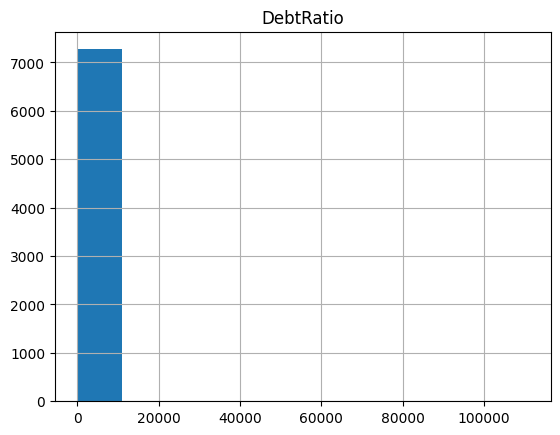

>>> Current breaks:
0.1,0.2,0.30000000000000004,0.4,0.7000000000000001,1.3 



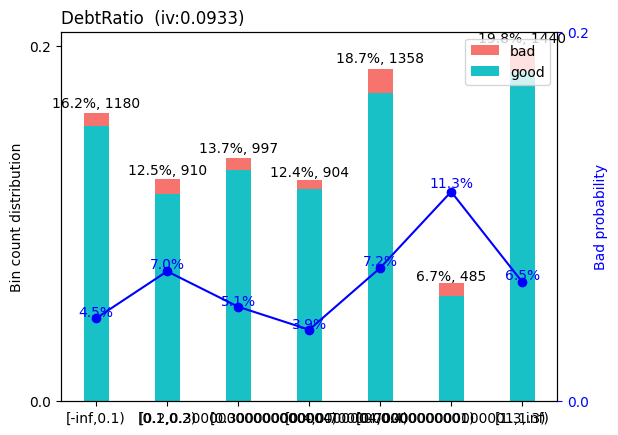

>>> Adjust breaks for (1/6) DebtRatio?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/6 MonthlyIncome --------
>>> dt[MonthlyIncome].describe(): 
count      7274.000000
mean       5561.626409
std        6988.551914
min           0.000000
25%        2100.000000
50%        4500.000000
75%        7500.000000
max      208333.000000
Name: MonthlyIncome, dtype: float64 



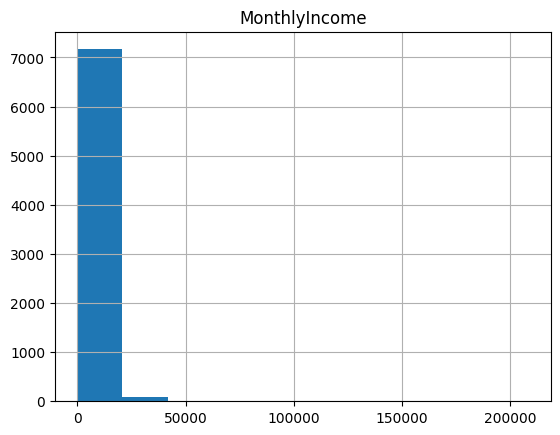

>>> Current breaks:
5000.0,7000.0 



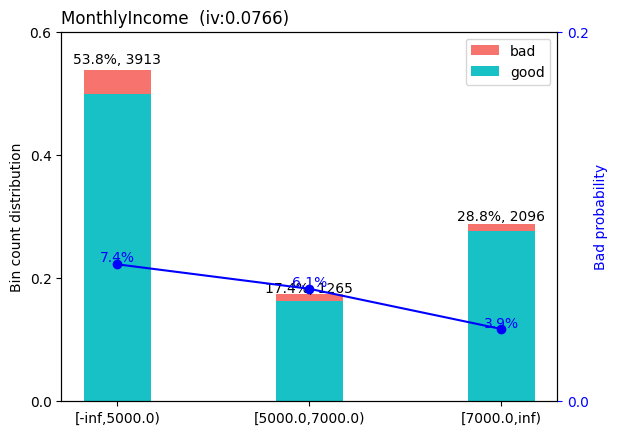

>>> Adjust breaks for (2/6) MonthlyIncome?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/6 NumberOfDependents --------
>>> dt[NumberOfDependents].describe(): 
count    7274.000000
mean        0.750756
std         1.132566
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        20.000000
Name: NumberOfDependents, dtype: float64 



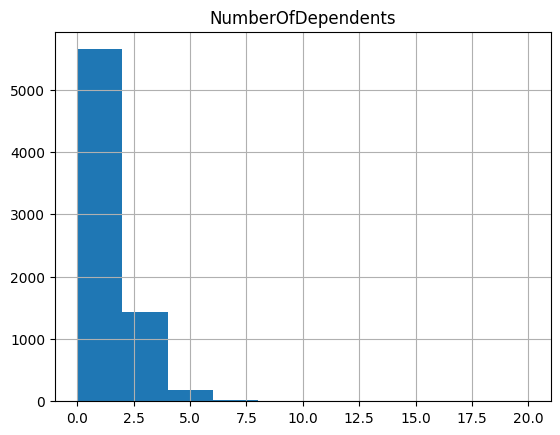

>>> Current breaks:
1.0,2.0,3.0 



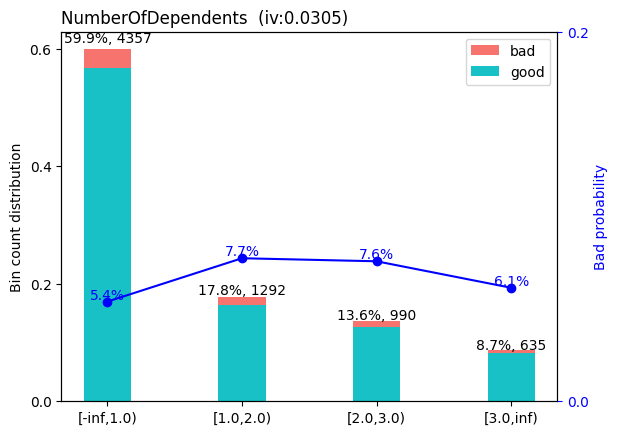

>>> Adjust breaks for (3/6) NumberOfDependents?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/6 NumberOfTime30-59DaysPastDueNotWorse --------
>>> dt[NumberOfTime30-59DaysPastDueNotWorse].describe(): 
count    7274.000000
mean        0.248557
std         0.701260
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: float64 

>>> dt[NumberOfTime30-59DaysPastDueNotWorse].value_counts(): 
0.0     6087
1.0      836
2.0      200
3.0       90
4.0       29
5.0       15
6.0       11
7.0        5
10.0       1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64 

>>> Current breaks:
1.0 



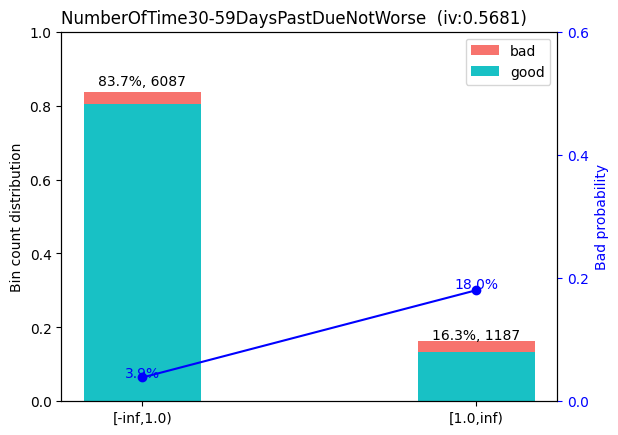

>>> Adjust breaks for (4/6) NumberOfTime30-59DaysPastDueNotWorse?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/6 RevolvingUtilizationOfUnsecuredLines --------
>>> dt[RevolvingUtilizationOfUnsecuredLines].describe(): 
count    7274.000000
mean        6.180830
std       185.658682
min         0.000000
25%         0.033654
50%         0.173919
75%         0.576635
max      9340.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64 



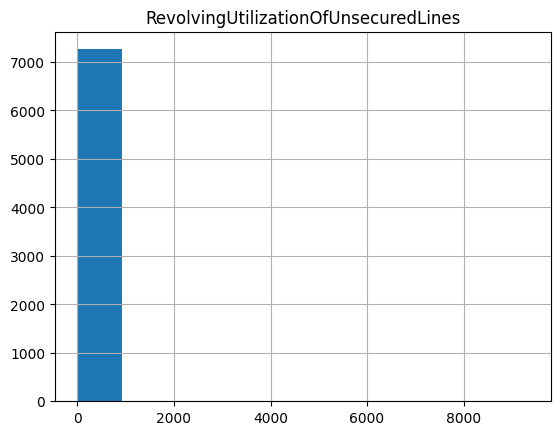

>>> Current breaks:
0.5,0.7000000000000001 



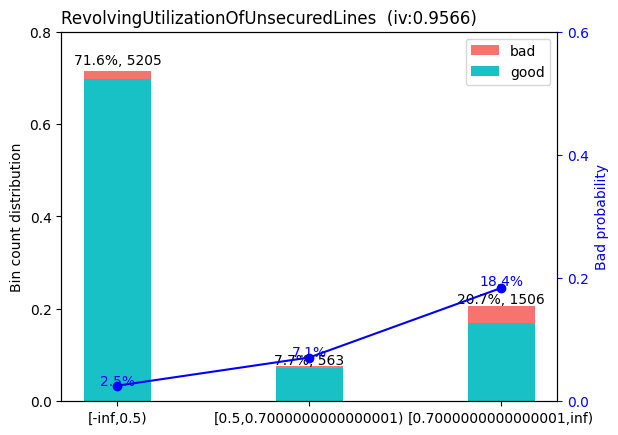

>>> Adjust breaks for (5/6) RevolvingUtilizationOfUnsecuredLines?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/6 age --------
>>> dt[age].describe(): 
count    7274.000000
mean       51.950921
std        14.504888
min        21.000000
25%        41.000000
50%        52.000000
75%        62.000000
max       101.000000
Name: age, dtype: float64 



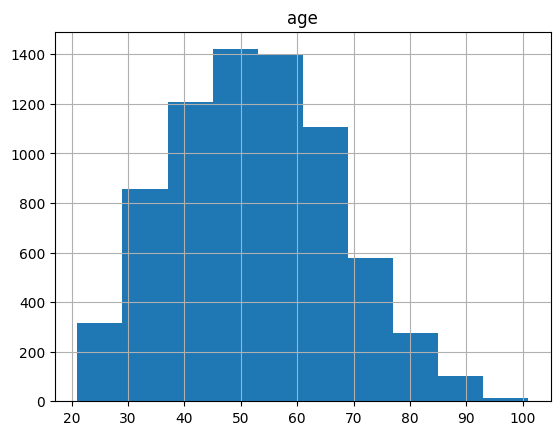

>>> Current breaks:
48.0,56.0,66.0 



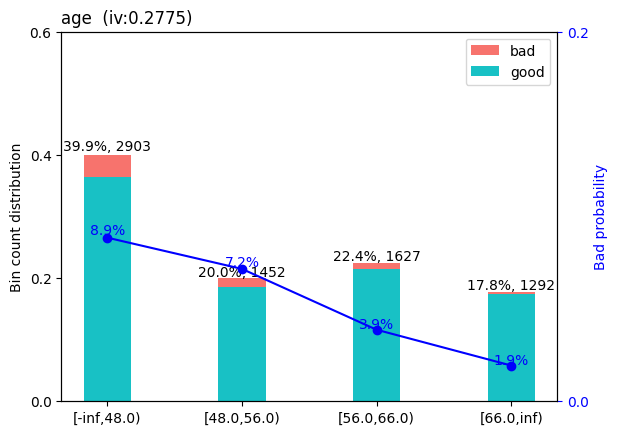

>>> Adjust breaks for (6/6) age?
1: next 
2: yes 
3: back
Selection: 1
[INFO] creating woe binning ...


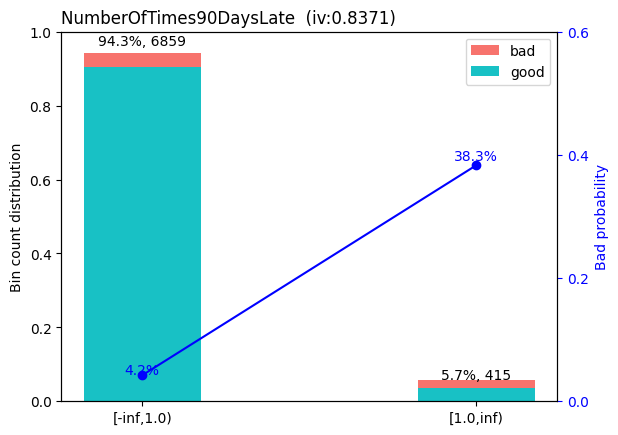

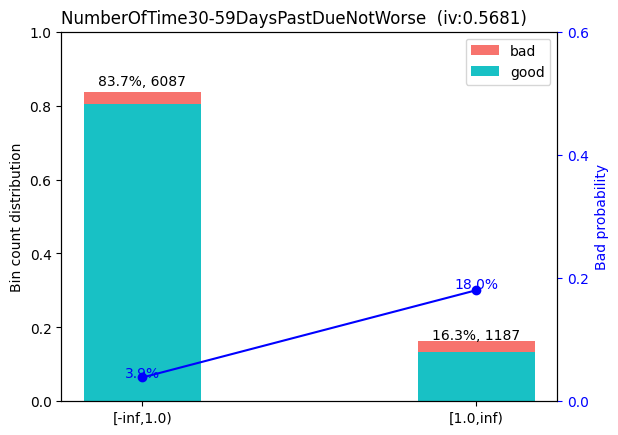

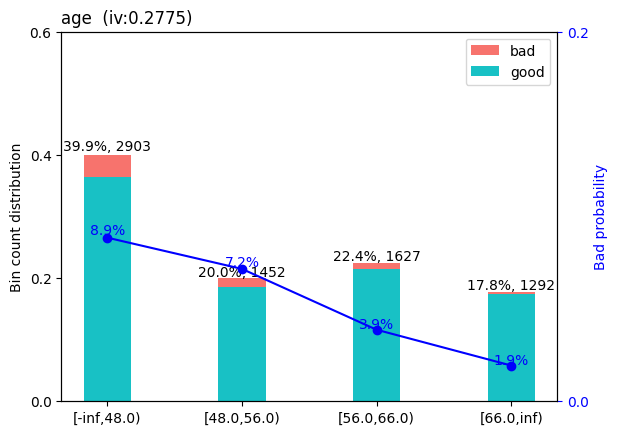

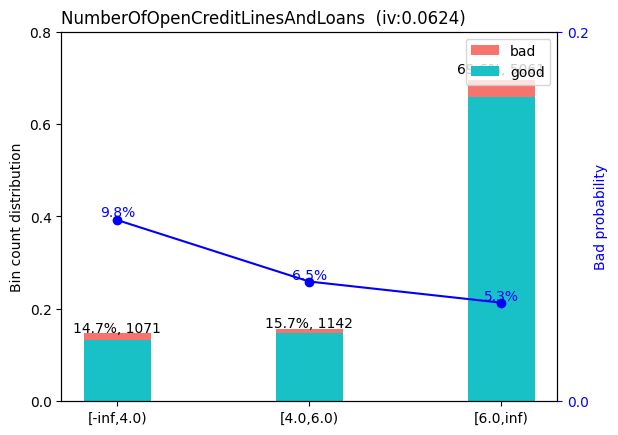

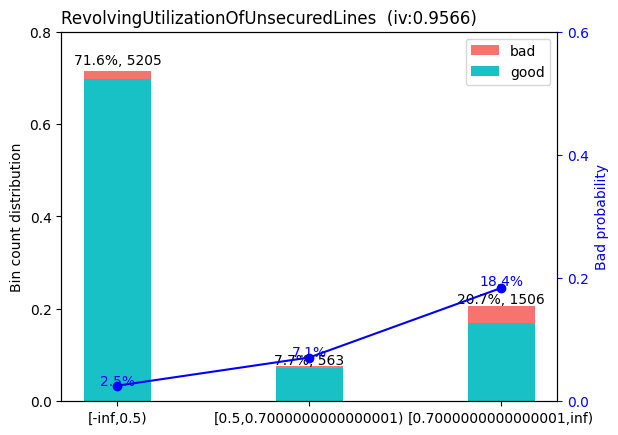

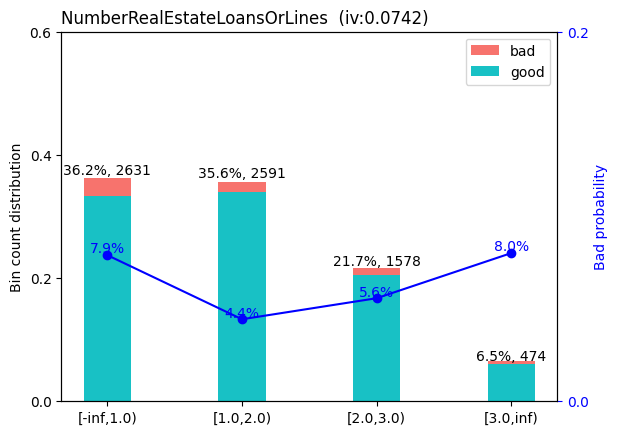

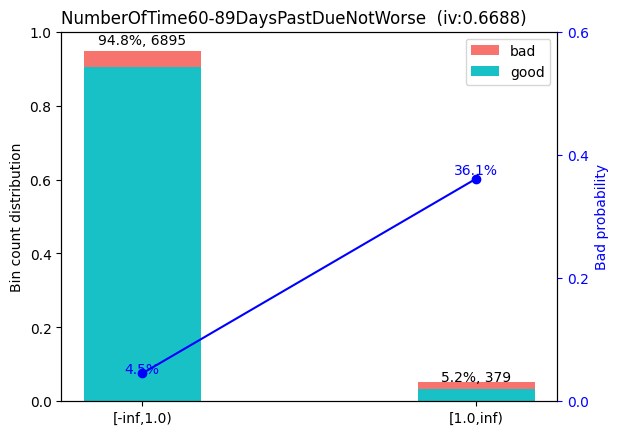

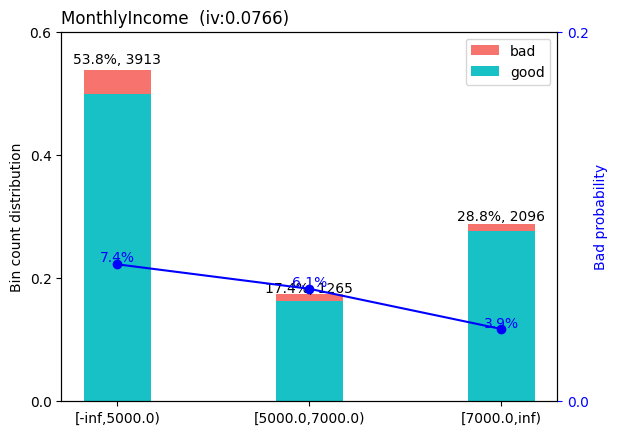

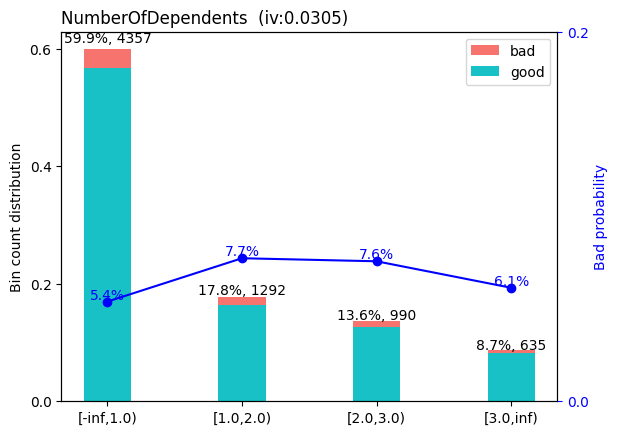

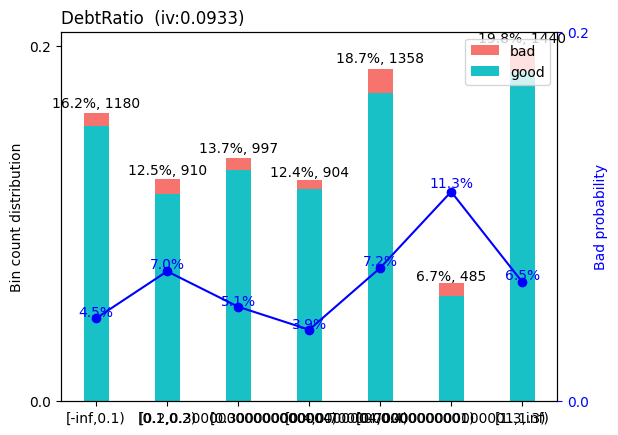

In [18]:
train_woe, test_woe, bins = WoEBin(train=train,test=test, yColumnName ='SeriousDlqin2yrs')
bins_adj = adjustWoEByAuto(train, bins,yColumnName ='SeriousDlqin2yrs')

[INFO] creating woe binning ...


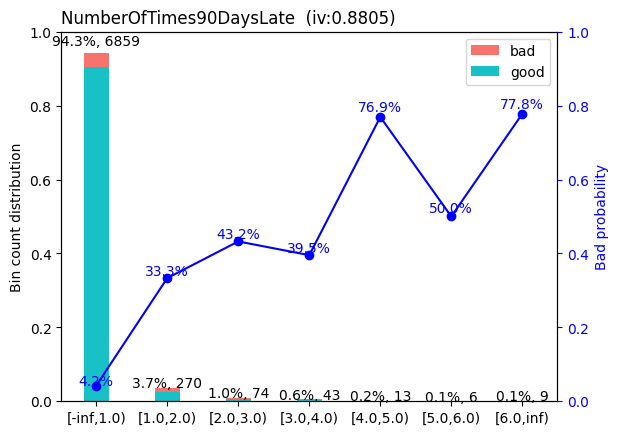

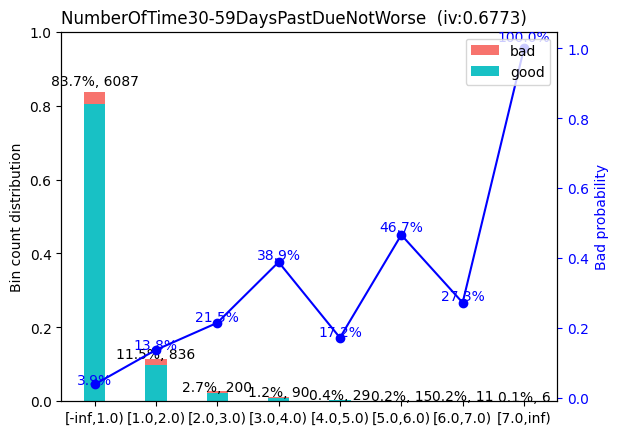

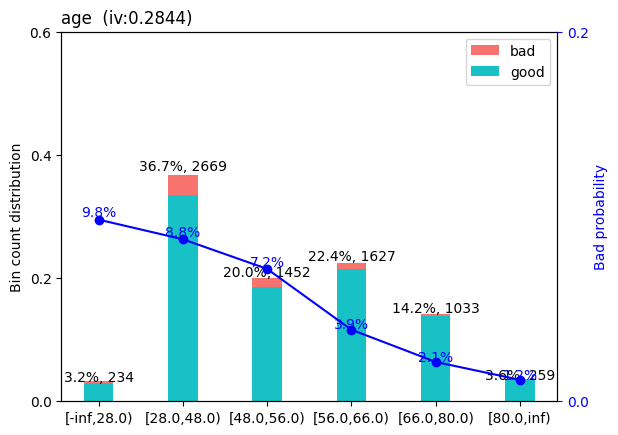

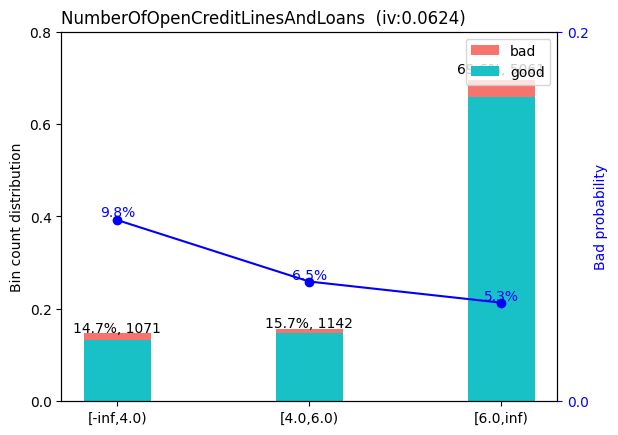

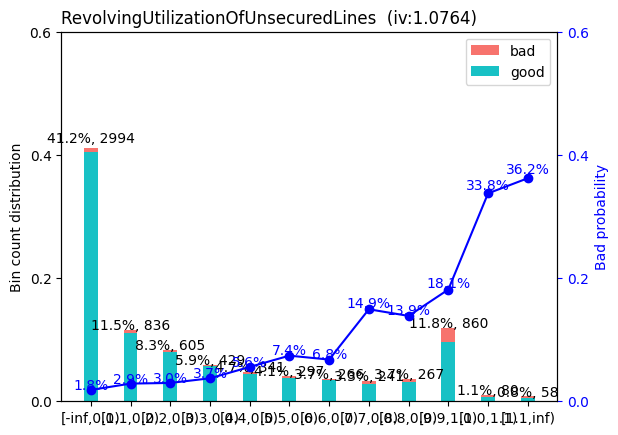

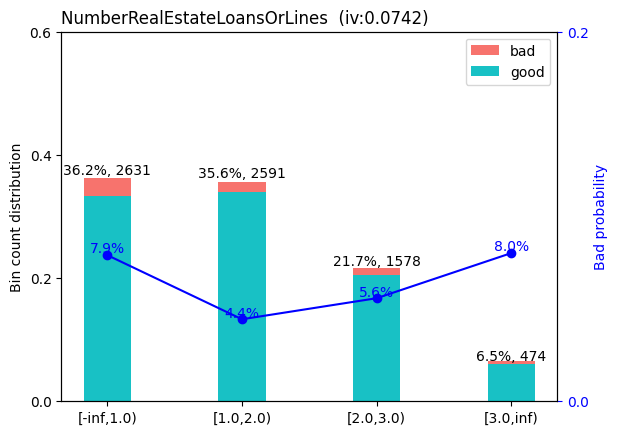

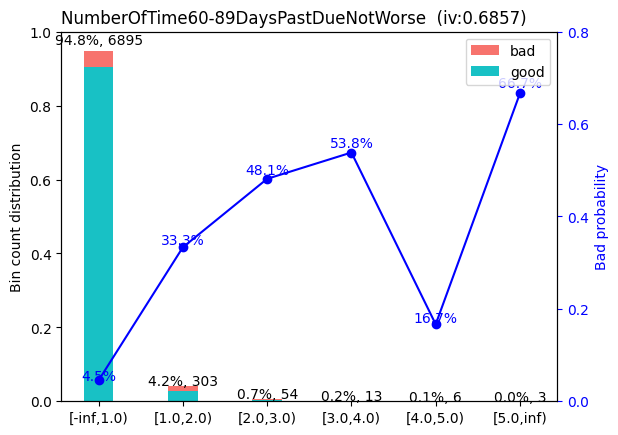

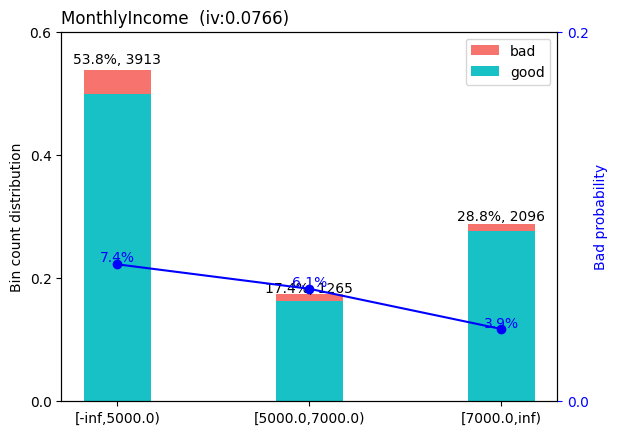

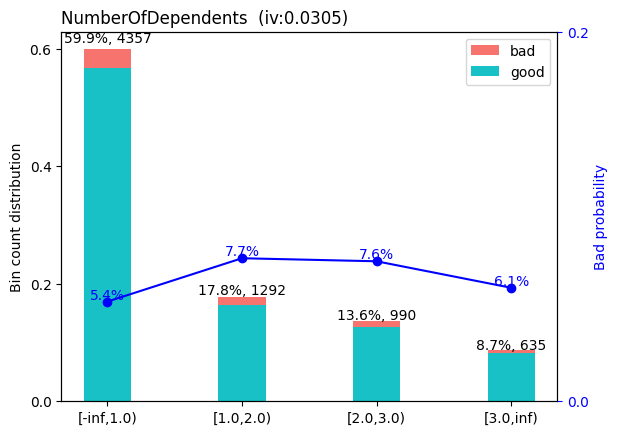

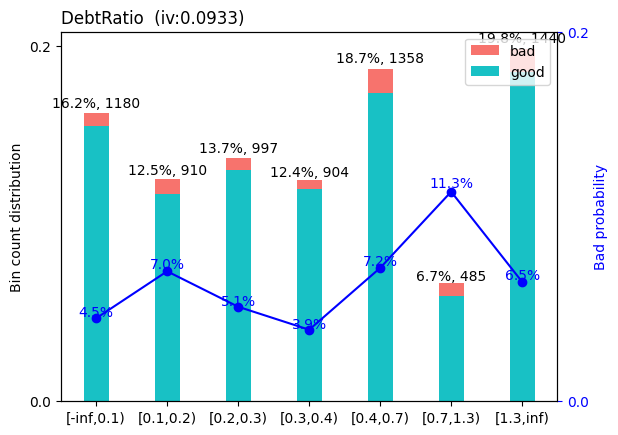

In [61]:
breaks_adj = {
        # Below are the intervals for different bins
        'DebtRatio': [0.1,0.2,0.3,0.4,0.7,1.3],
        'NumberOfTime30-59DaysPastDueNotWorse': [1.0,2.0,3.0,4.0,5.0,6.0,7.0],
        'RevolvingUtilizationOfUnsecuredLines':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1],
        'age':[28.0,48.0,56.0,66.0,80.0],
        'NumberOfTimes90DaysLate':[1.0,2.0,3.0,4.0,5.0,6.0],
        'NumberOfTime60-89DaysPastDueNotWorse': [1.0,2.0,3.0,4.0,5.0]
        #'NumberOfOpenCreditLinesAndLoans':[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,12.0,15.0,20.0,30.0]
    }
bins_adj = adjustWoEByManual(train, breaks_adj, yColumnName ='SeriousDlqin2yrs')

In [62]:
IVDestribution(train_woe, bins, yColumnName ='SeriousDlqin2yrs')
train_woe,test_woe = IVFiltering(train=train_woe, test=test_woe, bins_adj=bins, dropColumns=['NumberOfDependents_woe'])
X_train_woe = train_woe.iloc[:, 1:]
y_train_woe = train_woe.iloc[:, 0]
X_test_woe = test_woe.iloc[:, 1:]
y_test_woe = test_woe.iloc[:, 0]

[INFO] converting into woe values ...


ValueError: Number of processes must be at least 1

====================逻辑回归实现====================
---------------------------样本数据审查---------------------------
样本量: 7274 | 特征数: 10
--------------------------模型最优化参数---------------------------
最优得分: 0.9397849056033376
最优参数: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
真实值与预测值 ------------------------------ 
       SeriousDlqin2yrs  y_predict
9                  0.0        0.0
14                 0.0        0.0
15                 0.0        0.0
18                 0.0        0.0
20                 1.0        0.0
...                ...        ...
9688               0.0        0.0
9690               0.0        0.0
9691               0.0        0.0
9700               0.0        0.0
9702               0.0        0.0

[2425 rows x 2 columns]
模型 ------------------------------ 
 LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='liblinear')
模型系数 ------------------------------ 
 [[0.55704602 0.49960259 0.55509652 0.         0.57418779 0.57194605
  0.4611913  0.29138682 0.37195827 0.69999

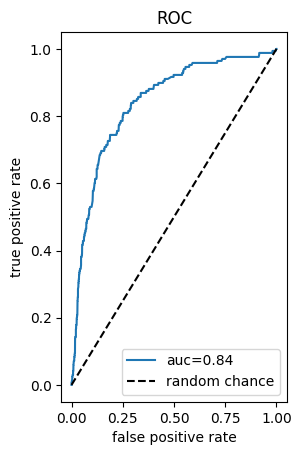

[0.0, 0.29138682108737823, 0.37195827085801014, 0.46119129672195147, 0.49960258555317777, 0.5550965248389685, 0.5570460190823412, 0.5719460500249739, 0.5741877861244692, 0.6999948427993169]


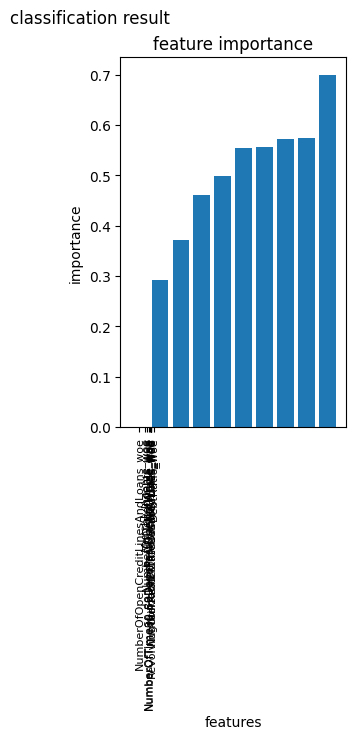

                                        var      coef
3       NumberOfOpenCreditLinesAndLoans_woe  0.000000
7                         MonthlyIncome_woe  0.291387
8                    NumberOfDependents_woe  0.371958
6  NumberOfTime60-89DaysPastDueNotWorse_woe  0.461191
1  NumberOfTime30-59DaysPastDueNotWorse_woe  0.499603
2                                   age_woe  0.555097
0               NumberOfTimes90DaysLate_woe  0.557046
5          NumberRealEstateLoansOrLines_woe  0.571946
4  RevolvingUtilizationOfUnsecuredLines_woe  0.574188
9                             DebtRatio_woe  0.699995
----------------------------混淆矩阵---------------------------- 
 +-------+-------+-------+
|       | 预测0 | 预测1 |
+-------+-------+-------+
| 真实0 |   14  |  154  |
| 真实1 |   30  |  2227 |
+-------+-------+-------+
分类准确率  0.9241237113402062
混淆矩阵 
 [[2227   30]
 [ 154   14]]
分类结果报告 
               precision    recall  f1-score   support

     class 0       0.94      0.99      0.96      2257
     class 1     

In [9]:
logisticRegression.LogisticRegress(X_train_woe,X_test_woe,y_train_woe,y_test_woe)